For Assignment 5, you are required to execute the following in one single notebook:
Retrieve the data from https://www.sciencedirect.com/science/article/pii/S2352340918315191
Complete the modelling for H1

Your H1 section should contain:
   1. Modelling IsCanceled as a classification problem
   2. Use at least two ML models, and a DummyClassifier benchmark
    
[OPTIONAL] <br>
After that, repeat the same analysis you did for H2. This involves:
  1. Cleaning H2
  2. Performing basic visualization on the features found in H2 - pick 3-5 and visualize them appropriately
  3. [Optional] A comment on how the 1-2 features found in H2 is different from H1
  4. Modelling IsCanceled as a classification problem
  5. At least two models, and a DummyClassifier benchmark

Good luck! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,f1_score,confusion_matrix

## Preprocessing

In [2]:
data = pd.read_csv(r"D:\PG_study\BS6201\week5\Dataset\H1.csv")
df_H1 = data.copy()
print(df_H1.shape)
df_H1

(40060, 31)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [3]:
# Since I found Column 'company ' and 'Agent'are almost the NULL, so i decide to drop this column

print(df_H1['Company'])

df_H1 = df_H1.drop('Company',axis = 1)
df_H1 = df_H1.drop('Agent',axis = 1)
df_H1.shape

0               NULL
1               NULL
2               NULL
3               NULL
4               NULL
            ...     
40055           NULL
40056           NULL
40057           NULL
40058           NULL
40059           NULL
Name: Company, Length: 40060, dtype: object


(40060, 29)

In [4]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['ArrivalDateMonth'] = number.fit_transform(data.ArrivalDateMonth)
    data['AssignedRoomType'] = number.fit_transform(data.AssignedRoomType)
    data['ReservedRoomType'] = number.fit_transform(data.ReservedRoomType)
    data['Meal'] = number.fit_transform(data.Meal)
    data['Country'] = number.fit_transform(data.Country)
    data['MarketSegment'] = number.fit_transform(data.MarketSegment)
    data['DistributionChannel'] = number.fit_transform(data.DistributionChannel)
    data['DepositType'] = number.fit_transform(data.DepositType)
    data['CustomerType'] = number.fit_transform(data.CustomerType)
    data['ReservationStatus'] = number.fit_transform(data.ReservationStatus)
    data['ReservationStatusDate'] = number.fit_transform(data.ReservationStatusDate)
    data=data.fillna(-999)
    return data

df_H1 = convert(df_H1)
df_H1.shape

(40060, 29)

## Dummy Classification

In [5]:
# split data to independent and dependednt
X = df_H1.drop('IsCanceled',axis = 1)
y = df_H1["IsCanceled"]

# split into test data and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)


In [6]:
# establish benchmark

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

In [7]:
# measure the performance
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test,dummy_pred))))
print('F1 score: '+str(f1_score(y_test,dummy_pred)))
print('Score: '+ str(dummy.score(X_test,y_test)))

RMSE: 0.5268620545865448
F1 score: 0.0
Score: 0.7224163754368448


## Random Forest Classification


In [9]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)
rc_pred  = rc.predict(X_test)

In [10]:
# measure the performance
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test,rc_pred))))
print('F1 score: '+str(f1_score(y_test,rc_pred)))
print('Score: '+ str(rc.score(X_test,y_test)))

RMSE: 0.0
F1 score: 1.0
Score: 1.0


## Support Vector Machine

In [11]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred  = svm.predict(X_test)

In [12]:
# measure the performance
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test,svm_pred))))
print('F1 score: '+str(f1_score(y_test,svm_pred)))
print('Score: '+ str(svm.score(X_test,y_test)))

RMSE: 0.5139103464940646
F1 score: 0.10262934690415605
Score: 0.7358961557663505


## Decision Tree

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [14]:
# measure the performance
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test,dt_pred))))
print('F1 score: '+str(f1_score(y_test,dt_pred)))
print('Score: '+ str(dt.score(X_test,y_test)))

RMSE: 0.0
F1 score: 1.0
Score: 1.0


## Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [16]:
# measure the performance
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test,lr_pred))))
print('Score: '+ str(lr.score(X_test,y_test)))

RMSE: 0.15238391235398677
Score: 0.8842031314529782


## [Optional]

### Cleaning H2


In [17]:
data = pd.read_csv(r"D:\PG_study\BS6201\week5\Dataset\H2.csv")
df_H2 = data.copy()
print(df_H2.shape)
df_H2.head(5)

(79330, 31)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [18]:
# we can see here in H2.csv 'Company' still has more than 95% values are NULL, we drop 'Company'
useless_index=[]

for i in range(0,31):
    if(df_H2.iloc[:,i].value_counts().max()>75362):
        useless_index.append(i)
for i in useless_index:
    print(df_H2.iloc[:,i].value_counts().idxmax())
    
df_H2 = df_H2.drop('Company',axis = 1)

0
0
0
       NULL
0
0


### Visualization

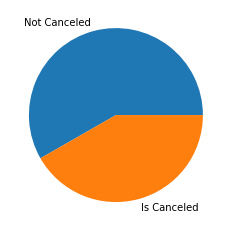

In [33]:
P = df_H2['IsCanceled'].value_counts()
#print(P)

mylabels = ["Not Canceled", "Is Canceled"]
plt.pie(P,labels = mylabels)
plt.show()


Text(0.5, 1.0, 'Frequency of Each month Booking')

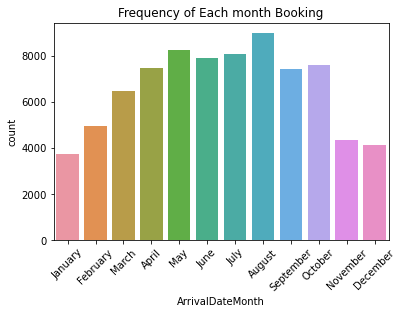

In [64]:
month_order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"]
plt.xticks(rotation=45)
sns.countplot(x = "ArrivalDateMonth", data = df_H2, order = month_order)
plt.title('Frequency of Each month Booking')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


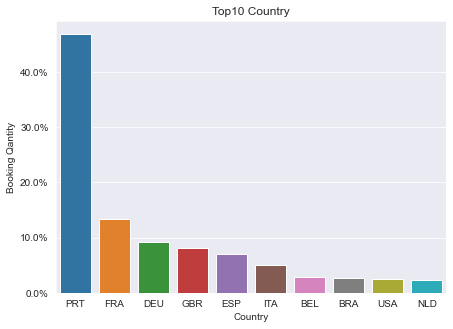

In [92]:
import pycountry as pc
import matplotlib.ticker as mtick

idx = df_H2["Country"].value_counts()[:10]

x = idx.index
y = idx/idx.sum()*100

x = x.values
y = y.values

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

#sns.barplot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

sns.set_style('darkgrid')
    
fig, ax = plt.subplots(figsize=(7,5))
    
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Country')
ax.set_ylabel('Booking Qantity')
ax.set_title("Top10 Country")

sns.barplot(x,y, ax = ax)

plt.show()